# <center> Lista 06 - Aprendizagem de Máquina</center>

**Aluno(a):** Marianna de Pinho Severo <br>
**Matrícula:** 374856 <br>
**Professor(a):** Regis Pires

## 1) Carregar o conjunto de dados

Nessa lista utilizaremos o dataset [Renda de Adultos nos EUA](https://archive.ics.uci.edu/ml/datasets/Adult), a partir do qual deveremos predizer se um adulto ganhará, ou não, mais de U$50.000,00 por ano.  

### Passo 01: Importar as bibliotecas
Primeiramente, importaremos as bibliotecas necessárias para que possamos realizar a lista.

In [103]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocessamento import transform
from preprocessamento import resample
from preprocessamento import metrics
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

### Passo 02: Criar a função que carrega os dados

Agora, criaremos uma função que lê o arquivo que contém o conjunto de dados. Para isso, primeiramente criaremos uma variável que contém o caminho para o arquivo:

In [2]:
DATASET_PATH = "dataset"

Agora criaremos a função:

In [3]:
def load_adult_data(dataset_path = DATASET_PATH):
    cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
    csv_path = os.path.join(dataset_path,'adult.csv')
    return pd.read_csv(csv_path, names = cols, skipinitialspace=True, na_values = '?')

### Passo 03: Carregar os dados

Agora, utilizaremos a função criada anteriormente para carregar os dados dentro da variável *adults*, a qual passará a possuir o tipo DataFrame do pandas.

In [44]:
adults = load_adult_data()

## 2) Fazer uma breve análise dos dados

Para isso, utilizaremos algumas funções disponíveis no Cap.2 do livro Hands-on.

### Passo 01: Método head()
Com o método *head()*, podemos observar as cinco primeiras linhas do conjunto de dados. Se passarmos um inteiro n como parâmetro, observaremos as n primeiras linhas. Conforme pode ser observado, as features são: **age**, **workclass**, **fnlwgt**, **education**, **education-num**, **marital-status**, **occupation**, **relationship**, **race**, **sex**, **capital-gain**, **capital-loss**, **hours-per-week** e **native-country**. A última coluna é o label, ou seja, a indicação de que a pessoa ganha mais de 50k ou não.

In [31]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Passo 02: Método info()

Com esse método, podemos observar informações sobre a quantidade total de linhas do conjunto de dados, os tipos de seus atributos e se existem dados faltantes ou não.

Conforme podemos observar, o conjunto de dados possui 32561 linhas, indo de 0 a 32560. Além disso, seus atributos variam entre inteiros (int64) e objetos. O label, por sua vez, é do tipo objeto. É importante destacar que, embora o *info()* mostre que não existem valores nulos nesse dataset, a descrição desse conjunto de dados avisa que os valores desconhecidos, os qual chamaríamos de null, foram substituidos pelo caractere **'?'. Portanto, ele possui valores nulos e podemos identificá-los através desse caractere.**

In [32]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Passo 03: Método describe()

O *describe()* apresenta uma tabela com os valores de média, desvio padrão, mínimo, máximo e percentis para os atributos de tipo numérico.

In [33]:
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Passo 04: Método value_counts()

Esse método nos permite agrupar o conjunto de dados de acordo com uma de suas colunas, apresentando a quantidade de cada dado igual dentro do conjunto.

Conforme podemos observar, as classes não estão balanceadas, possuindo mais pessoas com uma renda menor ou igual a 50000 por ano.

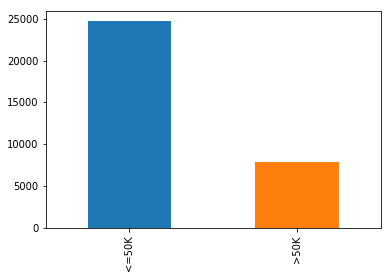

In [34]:
adults['label'].value_counts().plot(kind='bar')

### Passo 05: método corr()

Esse método nos permite observar a relação entre os valores numéricos do conjunto de dados.

In [35]:
adults.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### Passo 06: método tail()

Esse método mostra as cinco últimas linhas do conjunto de dados.

In [36]:
adults.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 3) Fazer o pre-processamento dos dados

### Passo 01: Retirar colunas que podem ser ignoradas

In [45]:
#Retiramos a coluna 'education' porque ela e 'education-num' dizem a mesma coisa/[]
adults = adults.drop(columns = 'education')

### Passo 02: Mapear labels para números

In [62]:
class_map = {label:idx for idx, label in enumerate(np.unique(adults['label']))}
adults['label'] = adults['label'].map(class_map)

### Passo 03: Mapear valores categóricos para números

In [50]:
adults = pd.get_dummies(adults)

In [63]:
unique_index = pd.Index(adults.columns)
label_index = unique_index.get_loc(key='label')

### Passo 03: Substituir valores NaN

In [86]:
imput = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)
imput = imput.fit(adults)
dataset = imput.transform(adults)  #o resultado é uma estrutura numpy
#adults = adults.apply(lambda x: x.fillna(x.value_counts().index[0]))
#adults

/home/marianna/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 3) Separar conjunto de treino e conjunto de teste
Para isso, utilizaremos a função split_stratified_train_test(), implementada em resample.py. Assim, faremos uma randomização dos dados e os distribuiremos, dentro dos conjuntos treino e teste, de  de acordo com seus percentuais no conjunto original.

### Passo 01: Separar dados de entrada dos dados de saída

In [87]:
y = dataset[:, label_index]
X = np.delete(dataset, label_index, axis=1)

### Passo 02: Separar conjunto de treino e teste

In [90]:
X,y,idx_train, idx_test = resample.split_stratified_train_test(X,y, 0.7, 42)

In [91]:
X_train = X[idx_train]
y_train = y[idx_train]

X_test = X[idx_test]
y_test = y[idx_test]

In [92]:
# np.unique(y, return_counts=True)
# 24720/(24720+7841), 7841/(24720+7841)
# np.unique(y_train, return_counts=True)
# 17323/(17323+5470), 5470/(17323+5470)
# np.unique(y_test, return_counts=True)
# 7397/(7397+2371), 2371/(7397+2371)

## 4) Standardizar e Normalizar

### Passo 01: Standardizar

In [93]:
model_std = transform.Standardize()

In [95]:
model_std.fit(X_train)

In [99]:
X_train_std = model_std.transform(X_train)
X_test_std = model_std.transform(X_test)

### Passo 02: Normalizar

In [100]:
model_norm = transform.Normalize()

In [101]:
model_norm.fit(X_train)

In [102]:
X_train_norm = model_norm.transform(X_train)
X_test_norm = model_norm.transform(X_test)

## 5) Usar algoritmos de classificação

In [108]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn import linear_model

### Modelo 01: Perceptron

In [137]:
perc_original =  Perceptron(tol=1e-3, random_state=42)
perc_std = Perceptron(tol=1e-3, random_state=42)
perc_norm = Perceptron(tol=1e-3, random_state=42)

In [138]:
perc_original.fit(X_train, y_train)
perc_std.fit(X_train_std, y_train)
perc_norm.fit(X_train_norm, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
y_pred_original = perc_original.predict(X_test)
y_pred_std = perc_std.predict(X_test_std)
y_pred_norm = perc_norm.predict(X_test_norm)

In [140]:
metrics.accuracy(y_test, y_pred_original)

0.7902334152334153

In [141]:
metrics.accuracy(y_test, y_pred_std)

0.7806101556101556

In [142]:
metrics.accuracy(y_test,y_pred_norm)

0.8371212121212122

### Modelo 02: Regressão Logística

In [143]:
log_original =  LogisticRegression(tol=1e-3, random_state=42)
log_std = LogisticRegression(tol=1e-3, random_state=42)
log_norm = LogisticRegression(tol=1e-3, random_state=42)

In [144]:
log_original.fit(X_train, y_train)
log_std.fit(X_train_std, y_train)
log_norm.fit(X_train_norm, y_train)

/home/marianna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marianna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marianna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.001, verbose=0, warm_start=False)

In [145]:
y_pred_original = log_original.predict(X_test)
y_pred_std = log_std.predict(X_test_std)
y_pred_norm = log_norm.predict(X_test_norm)

In [146]:
metrics.accuracy(y_test, y_pred_original)

0.795966420966421

In [147]:
metrics.accuracy(y_test, y_pred_std)

0.8517608517608518

In [148]:
metrics.accuracy(y_test, y_pred_norm)

0.8504299754299754

### Modelo 03: SGDClassifier

In [149]:
sgd_original =  linear_model.SGDClassifier(tol=1e-3, random_state=42)
sgd_std = linear_model.SGDClassifier(tol=1e-3, random_state=42)
sgd_norm = linear_model.SGDClassifier(tol=1e-3, random_state=42)

In [150]:
sgd_original.fit(X_train, y_train)
sgd_std.fit(X_train_std, y_train)
sgd_norm.fit(X_train_norm, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [151]:
y_pred_original = sgd_original.predict(X_test)
y_pred_std = sgd_std.predict(X_test_std)
y_pred_norm = sgd_norm.predict(X_test_norm)

In [152]:
metrics.accuracy(y_test, y_pred_original)

0.24078624078624078

In [153]:
metrics.accuracy(y_test, y_pred_std)

0.8363022113022113

In [155]:
metrics.accuracy(y_test, y_pred_norm)

0.8521703521703522